In [25]:
# Import the necessary python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import pickle

In [26]:
data=pd.read_csv("medical_insurance.csv")
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [27]:
data.shape

(2772, 7)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [29]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [30]:
data.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [31]:
data.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


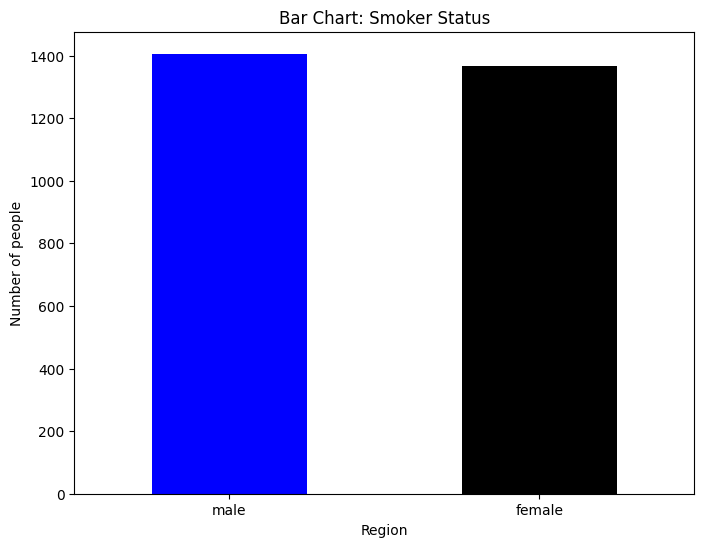

In [32]:
sex= data["sex"].value_counts()
plt.figure(figsize=(8, 6))
sex.plot(kind='bar', color=['blue', 'black'])
plt.title('Bar Chart: Smoker Status')
plt.xlabel('Region')
plt.ylabel('Number of people')
plt.xticks(rotation=0)
plt.show()

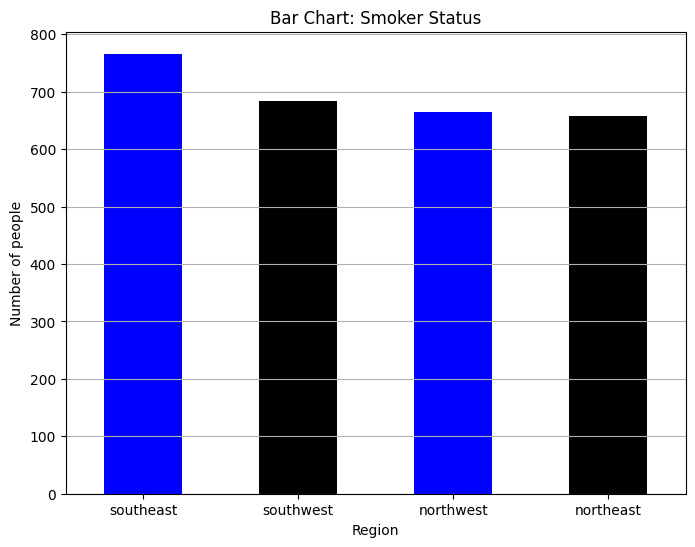

In [33]:
regions=data["region"].value_counts()
plt.figure(figsize=(8, 6))
regions.plot(kind='bar', color=['blue', 'black'])
plt.title('Bar Chart: Smoker Status')
plt.xlabel('Region')
plt.ylabel('Number of people')
plt.xticks(rotation=0)
plt.grid(True, axis='y')
plt.show()

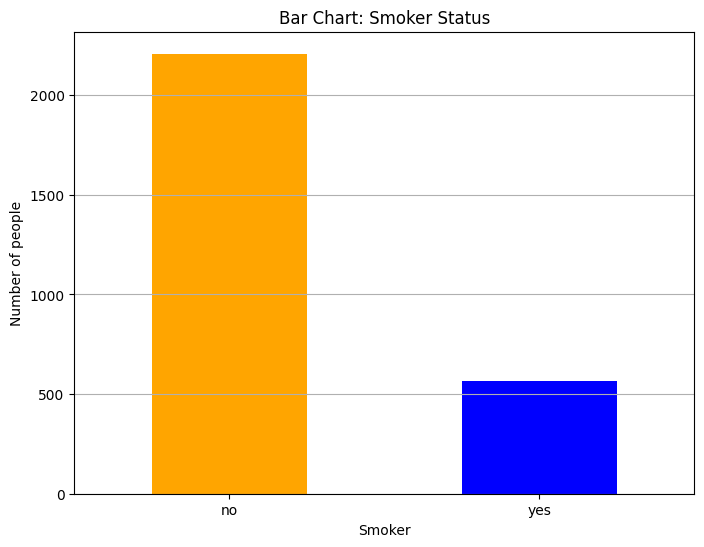

In [34]:
smoker= data["smoker"].value_counts()
plt.figure(figsize=(8, 6))
smoker.plot(kind='bar', color=['orange', 'blue'])

plt.title('Bar Chart: Smoker Status')
plt.xlabel('Smoker')
plt.ylabel('Number of people')
plt.xticks(rotation=0)
plt.grid(True, axis='y')
plt.show()

In [35]:
#changing categorical data to numerical
label_encoder = LabelEncoder()

for column in ["sex", "smoker"]:
    data[column] = label_encoder.fit_transform(data[column])
# Apply One-Hot Encoding to 'region'
data = pd.get_dummies(data, columns=['region'], drop_first=True)

In [36]:
data.head(5)
data= data.astype(int)
data.head(5)

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27,0,1,16884,0,0,1
1,18,1,33,1,0,1725,0,1,0
2,28,1,33,3,0,4449,0,1,0
3,33,1,22,0,0,21984,1,0,0
4,32,1,28,0,0,3866,1,0,0


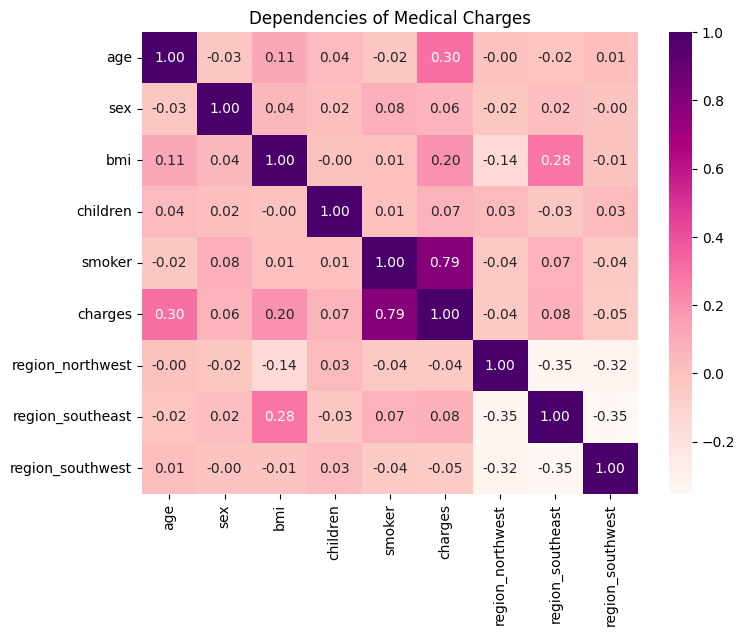

In [37]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(corr, cmap='RdPu', annot=True, fmt=".2f", ax=ax)
plt.title("Dependencies of Medical Charges")
plt.savefig('Cor')
plt.show()

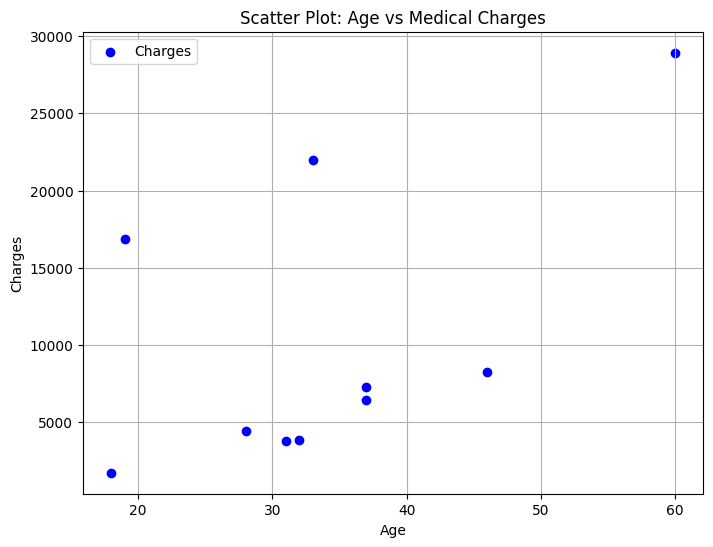

In [38]:
# Scatter plot for 'age' vs 'charges'
plt.figure(figsize=(8, 6))
plt.scatter(data['age'].head(10), data['charges'].head(10), color='b', label='Charges')
plt.title('Scatter Plot: Age vs Medical Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.grid(True)
plt.show()

In [39]:
# Split the dataset into target and features
y = data["charges"]
x = data.drop(["charges"], axis=1)

In [40]:
# Split the features and target dataset into train and test sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [41]:
# Fit model to the training data
model = LinearRegression()

model.fit(x_train, y_train)

LinearRegression()

In [42]:
# Predict the target values for the features test set
y_pred = model.predict(x_test)

In [43]:
x_test

,age,sex,bmi,children,smoker,region_northwest,region_southeast,region_southwest
1106,49,0,29,0,0,1,0,0
1321,62,1,26,0,1,0,0,0
2313,57,0,20,1,0,0,0,1
2274,22,1,39,0,0,0,0,1
1432,18,0,38,2,0,0,0,0
...,...,...,...,...,...,...,...,...
930,26,1,46,1,0,0,1,0
2610,41,1,23,1,0,0,0,0
1700,27,0,31,0,1,0,0,1
100,41,0,31,0,0,0,0,1


In [44]:
y_pred

array([ 1.02486077e+04,  3.68031508e+04,  9.14343502e+03,  5.88346844e+03,
        6.59387561e+03,  3.39558196e+04,  5.74776542e+03,  3.88847277e+04,
        1.17986710e+04,  3.43519275e+03,  1.25048500e+04,  1.28258860e+04,
        5.11826619e+03,  1.14399741e+04,  4.07910995e+03,  7.94893676e+03,
        1.00435880e+04,  9.24130449e+03,  4.99453684e+03,  3.84770156e+03,
        1.28602825e+04,  3.33382617e+04,  3.07966205e+04,  3.96318294e+04,
        2.75907939e+04,  9.43555433e+03, -1.35975434e+03,  1.65971264e+04,
        8.09246387e+03, -4.23464913e+02,  1.42135723e+04,  3.66713939e+03,
        2.86601473e+03,  2.30753238e+03,  1.47658211e+04,  1.16940069e+04,
        1.56999679e+03,  2.33421582e+03,  8.19036572e+03,  3.19727777e+04,
        6.15398544e+03,  9.71801261e+03,  1.42479364e+04,  6.85467069e+03,
        3.36061944e+02,  4.05035789e+04,  4.08984746e+03,  3.53735940e+04,
        5.29338603e+03,  7.03729694e+03,  3.60844785e+04,  9.48088695e+03,
        3.48375435e+03,  

In [45]:
#Evaluate the regression metrics for the trained model
mse = mean_squared_error(y_test, y_pred)
print(mse)
r2 = r2_score(y_test, y_pred)
rmse= np.sqrt(mse)
print(rmse)
print(r2)

39953750.27870349
6320.89790130354
0.7396828557409347


In [46]:
random_forest=RandomForestRegressor()
decision_tree=DecisionTreeRegressor()


model_rf= random_forest.fit(x_train,y_train)
model_dt= decision_tree.fit(x_train,y_train)

y_pred_rf=model_rf.predict(x_test)
y_pred_dt=model_dt.predict(x_test)

rmse_rf=np.sqrt(mean_squared_error(y_test,y_pred_rf))
rmse_dt=np.sqrt(mean_squared_error(y_test,y_pred_dt))

model_rank = {
'linear regression' : rmse,
'Random Forest' : rmse_rf,
'Decision Trees' : rmse_dt


}
model_rank=sorted(model_rank.items(), key=lambda x: x[1])
print (model_rank)

[('Random Forest', 2819.7500511922285), ('Decision Trees', 2826.305078704511), ('linear regression', 6320.89790130354)]


In [49]:
predicted_actual= pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    #'Difference': y_test - y_pred
})
predicted_actual.head()

,Actual,Predicted
1106,8988,10248.607738
1321,28101,36803.150828
2313,12032,9143.435023
2274,1682,5883.468445
1432,3393,6593.875610


In [48]:
predicted_actual= pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_dt,
    #'Difference': y_test - y_pred_rf
})
predicted_actual.head()

,Actual,Predicted
1106,8988,8988.0
1321,28101,28101.0
2313,12032,12032.0
2274,1682,1682.0
1432,3393,3393.0


In [53]:
with open('randomforest.pkl','wb')as file:
  pickle.dump(decision_tree,file)